In [22]:
# Import neccessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
file_path = '../data/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Count headlines per day
daily_headlines = df.groupby('date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'Date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('Date', inplace=True)
time_series_data

,Headlines_Count
Date,
2009-02-14 00:00:00,1
2009-04-27 00:00:00,2
2009-04-29 00:00:00,1
2009-05-22 00:00:00,1
2009-05-27 00:00:00,6
...,...
2020-06-11 16:49:41-04:00,1
2020-06-11 16:51:33-04:00,1
2020-06-11 17:01:39-04:00,1


In [7]:
# Inspect info about the time series data
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39957 entries, 2009-02-14 00:00:00 to 2020-06-11 17:12:35-04:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Headlines_Count  39957 non-null  int64
dtypes: int64(1)
memory usage: 624.3+ KB


In [8]:
# Evaluate common statistical distribution about the time series data
time_series_data.describe()

,Headlines_Count
count,39957.000000
mean,35.221063
std,131.426356
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1766.000000


# TSA Plots

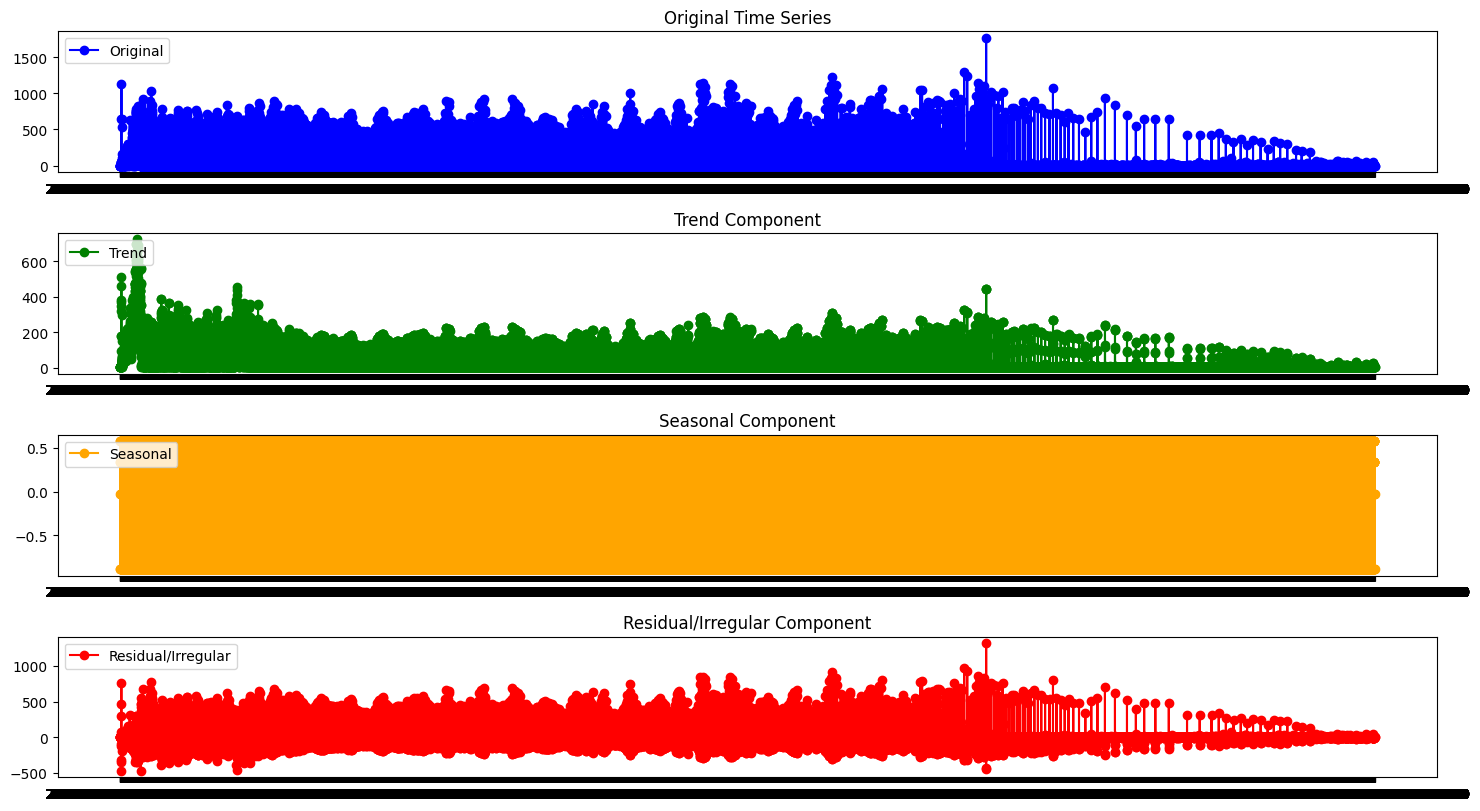

In [21]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'],
                                   model='additive', period=4)

plt.figure(figsize=(15, 10))

# Plot the headline count
plt.subplot(511)
plt.plot(time_series_data['Headlines_Count'],
         label='Original', color="blue",
          linestyle='-', marker='o')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Plot the trend
plt.subplot(512)
plt.plot(decomposition.trend,
         label='Trend', color="green",
            linestyle='-', marker='o')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Plot the seasonality
plt.subplot(513)
plt.plot(decomposition.seasonal,
         label='Seasonal', color="orange",
          linestyle='-', marker='o')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Plot the irregularity
plt.subplot(514)
plt.plot(decomposition.resid, 
         label='Residual/Irregular', color='red',
          linestyle='-', marker='o')
plt.legend(loc='upper left')
plt.title('Residual/Irregular Component')

# Show the plot
plt.tight_layout()
plt.show()


# Simulating the data for validation

In [16]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", end="2023-05-01", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set Date as index
simulated_data.set_index('Date', inplace=True)


In [19]:
# Seasonal decomposition
decomposition = seasonal_decompose(simulated_data['Headlines_Count'], 
                                   model='additive', period=7)

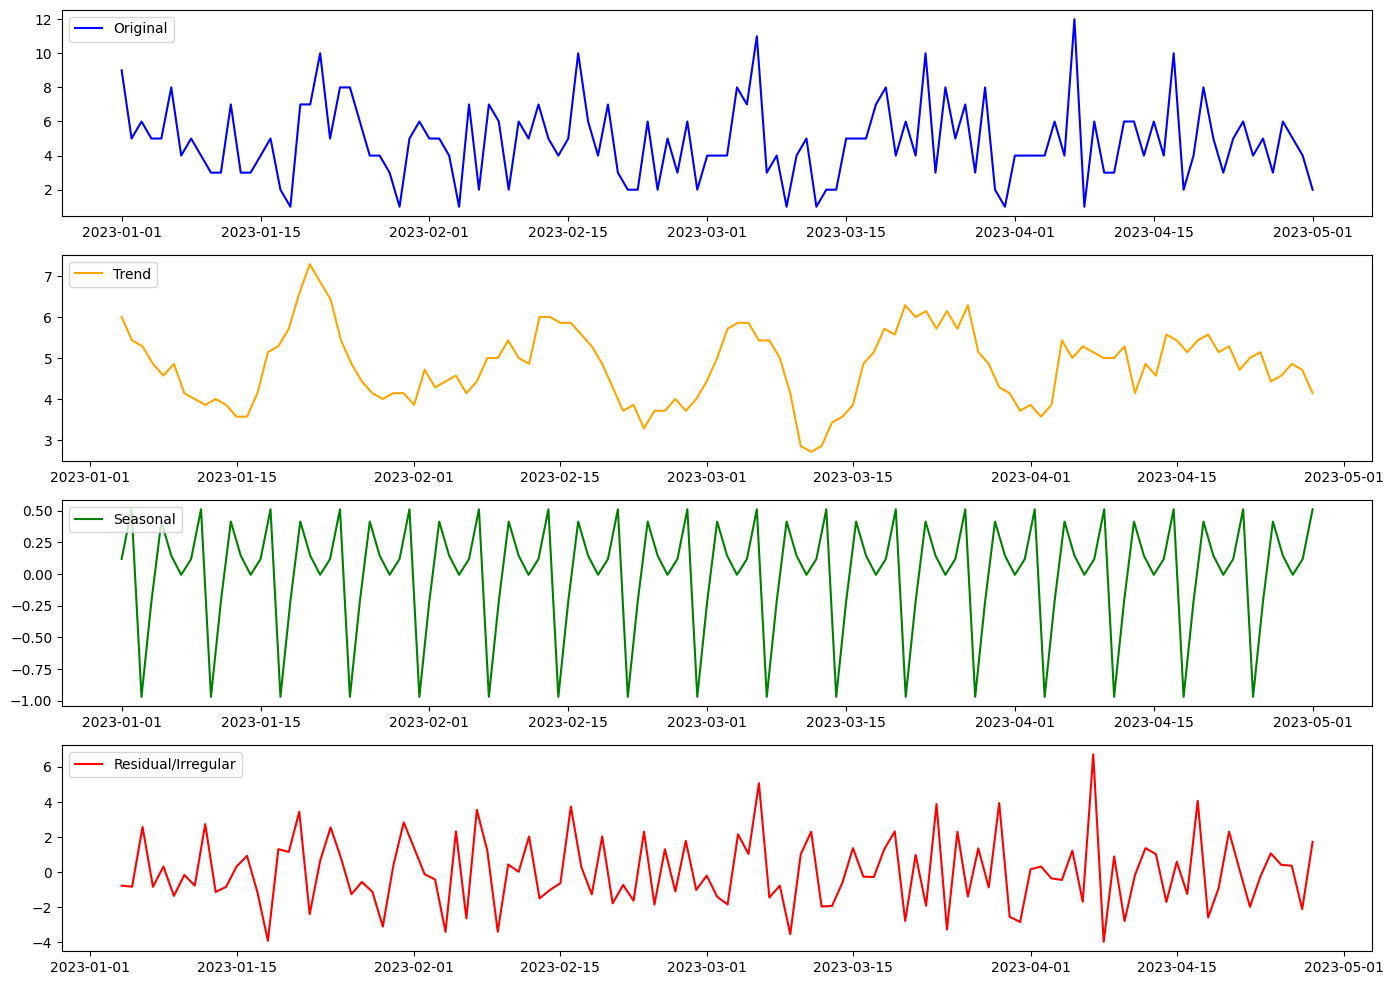

In [20]:
# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(simulated_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()